In [3]:
import pandas as pd
import seaborn as sns
import matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import scipy.stats
import statsmodels.api as sm

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<b>For the "Median value of owner-occupied homes" provide a boxplot



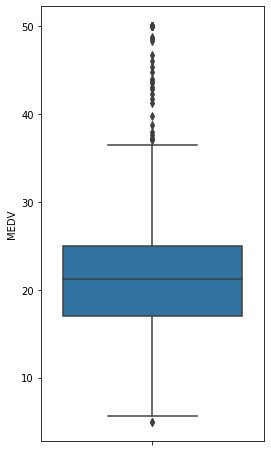

In [37]:
plt.figure(figsize=(4,8))
sns.boxplot(y=boston_df['MEDV'])


We can see from this box plot that madian value of owner occupied homes is normally distributed.

<b>Provide a  histogram for the Charles river variable



In [10]:
boston_df.loc[(boston_df['CHAS'] == 0), 'Charles_river'] = 'not bounds river'
boston_df.loc[(boston_df['CHAS'] == 1), 'Charles_river'] = 'bounds river'

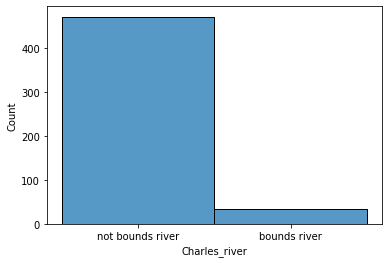

In [9]:
sns.histplot(data=boston_df, x='Charles_river')

The histogram shows that there are approximately 10 times more tracts that do not bound river that tracts that bound river.

<b>Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



In [14]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

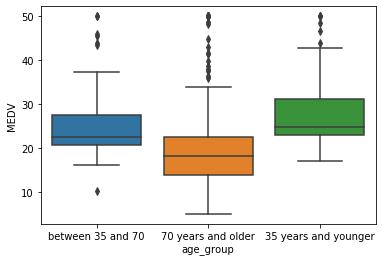

In [15]:
sns.boxplot(data=boston_df, y='MEDV', x='age_group')

The plot above shows that the 2nd group is normally distributed, while 1st and 3rd groups' medians are biased.

<b>Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



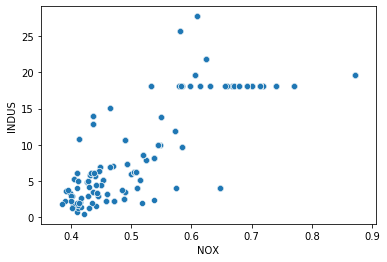

In [22]:
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')

We can assume that there exists a positive relationship Nitric oxide concentrations and the proportion of non-retail business acres per town.

<b>Create a histogram for the pupil to teacher ratio variable

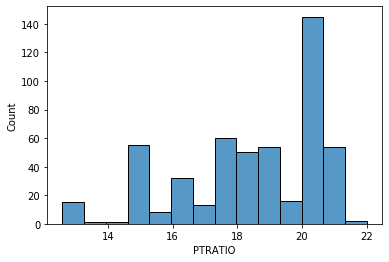

In [23]:
sns.histplot(data=boston_df, x='PTRATIO')

The pupil to teacher ratio variable is not normally distributed.

<b>Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [12]:
#H0: there is no significance difference in median value of houses bounded by the Charles river
#H1 there is a significance difference in median value of houses bounded by the Charles river
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river based on gender

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

In [ ]:
#H0: there is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940
#H1 there is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940


In [16]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                  boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'],
                  boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                  center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

p-value is greater than 0,05 so the variance are equal


In [17]:
thirtyfive_lower=boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
between_35_and_70=boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
seventy_higher=boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [18]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, between_35_and_70, seventy_higher)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** since the p-value is less than 0,05 we reject the null hypothesis as there is enough proof that there is a difference in median values for each proportion of owner occupied units built prior to 1940

<b>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [19]:
#H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town (Pcorr=0)
#H1: here is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town 
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** since the p-value is less than 0,05 we reject the null hypothesis
Also the Pearson correlation = 0,76, that means that there is a a positive relationship

<b>What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [25]:
#H0: there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
#H1: there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
X=boston_df['DIS']
y=boston_df['MEDV']
X = sm.add_constant(X) 
model=sm.OLS(y, X).fit()
prediction=model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.21e-08
Time:                        23:14:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p-value is less than 0,05, so we reject the null hypothesis as there is an impact of additional distance on the median value of owner occupied homes